In [1]:
asdf=1

1

El siguiente 'ejercicio' es la intro de la paquetería ImageView, que está en:

https://github.com/timholy/ImageView.jl

In [1]:
using Images, ImageView, VideoIO

In [2]:
f=VideoIO.opencamera("/dev/video0")

img=VideoIO.read(f,Image);
imageneses=typeof(img)[]
tipoFotos=typeof(imageneses);

function pasafotos()  # vacía la memoria de 33 fotos que tiene la camara
    for i=1:35 #en principio podría ser 32
        VideoIO.retrieve(f)
    end
end

function guardafotos!(n::Int64,ima::tipoFotos) #agrega a ima (vector de imagenes) las n imagenes capturadas
    pasafotos()
    for i=1:n
        push!(ima,VideoIO.retrieve(f,Image))
    end
end  

fotos=typeof(img)[]
guardafotos!(3,fotos) #numero de imagenes

close(f.avin)

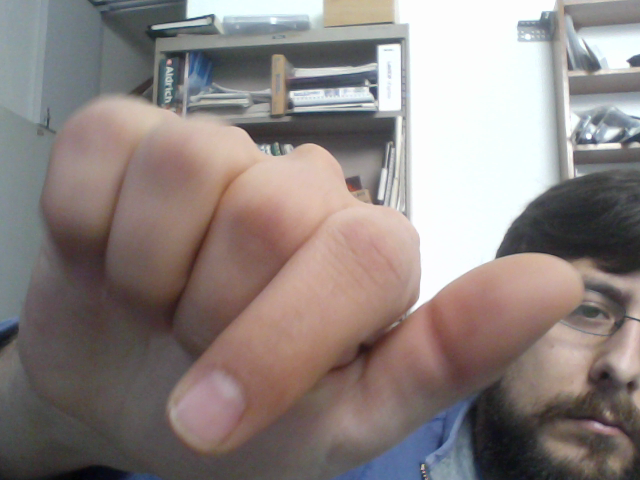

In [8]:
fotos[1]

In [4]:
img1=fotos[1]
ImageView.view(img1)

(ImageCanvas,ImageSlice2d: zoom = BoundingBox(0.0,640.0,0.0,480.0))

In [5]:
println((img1.data[1,1]).r)
println((img1.data[1,1]).g)
println((img1.data[1,1]).b)

Ufixed8(0.976)
Ufixed8(0.992)
Ufixed8(1.0)


In [31]:
ImageView.view(img1, pixelspacing = [1,1])

(ImageCanvas,ImageSlice2d: zoom = BoundingBox(0.0,640.0,0.0,480.0))

In [7]:
img1["pixelspacing"]=[1,1]
ImageView.view(img1)

(ImageCanvas,ImageSlice2d: zoom = BoundingBox(0.0,640.0,0.0,480.0))

In [62]:
ImageView.view(img1, pixelspacing = [1,1], flipy=true)

(ImageCanvas,ImageSlice2d: zoom = BoundingBox(0.0,640.0,0.0,480.0))

In [9]:
ImageView.view(img1, pixelspacing = [1,1], xy=["y","x"])

(ImageCanvas,ImageSlice2d: zoom = BoundingBox(0.0,480.0,0.0,640.0))

In [31]:
img2=include(joinpath(Pkg.dir(), "ImageView", "test", "test4d.jl"))

RGB24 Image with:
  data: 201x301x31x60 Array{Uint32,4}
  properties:
    timedim: 4
    colorspace: RGB24
    spatialorder:  x y z
    pixelspacing:  1 1 3

In [49]:
img2View=ImageView.view(img2)[1]

ImageCanvas

In [66]:
println(names(img2View))
img2View.transpose

[:render!,:aspect_x_per_y,:background,:perimeter,:transpose,:flipx,:flipy,:surfaceformat,:annotations,:handles,:c,:surface,:renderbuf,:canvasbb,:navigationstate,:navigationctrls]


false

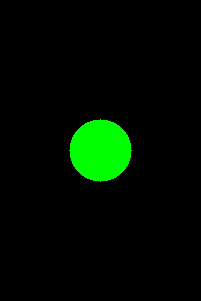

In [113]:
img2View.surface #imprime sin ventana la foto

In [68]:
canvas(img2View)==img2View.c

true

In [6]:
img3=fotos[3]
img3View=ImageView.view(img3, pixelspacing = [1,2])
sleep(2)
ImageView.view(img3View[1],img1) #Con esto cambio la imagen en la ventana (manteniendo codiciones como pixelspacing, etc...)
sleep(2)
destroy(toplevel(img3View[1])); #Con esto cierro la ventana emergente

""

In [7]:
img3=fotos[3]
img3View=ImageView.view(img3, flipy=true)
sleep(2)
ImageView.view(canvas(img3View[1]),img1) #Es lo mismo que antes pero recetea condiciones
sleep(2)
destroy(toplevel(img3View[1])); #Con esto cierro la ventana emergente

""

In [8]:
img3=fotos[3]
img3View=ImageView.view(img3, pixelspacing = [1,2])
sleep(2)
ImageView.set_size(toplevel(img3View[1]),640,480) #Cambia tamaño de la ventana emergente
                                                    #estos números (640,480) se pueden sacar de img3View[2].dims
sleep(2)
ImageView.view(canvas(img3View[1]),img1) #Cambia imagen receteando condiciones
sleep(2)
destroy(toplevel(img3View[1])); #Con esto cierro la ventana emergente

""

In [9]:
c=canvasgrid(2,1)
ops = [:pixelspacing => [1,1]]
cView=ImageView.view(c[1,1], img1 ; ops...)
ImageView.view(c[2,1], img3 ; ops...)
sleep(5)
destroy(toplevel(cView[1])); #Con esto cierro la ventana emergente

""

In [10]:
img1View, img1View11 = ImageView.view(img1)
len= 100
ImageView.scalebar(img1View, img1View11, len; x = 0.5, y = 0.5)
sleep(5)
destroy(toplevel(img1View)); #Con esto cierro la ventana emergente

""

In [178]:
using Images, Color
import ImageView
z = ones(10,50);
y = 8; x = 2;
z[y,x] = 0
zimg = convert(Image, z)
imgc, img2 = ImageView.view(zimg,pixelspacing=[1,1]);
Tk.set_size(ImageView.toplevel(imgc), 200, 200)
idx = ImageView.annotate!(imgc, img2, ImageView.AnnotationText(x, y, "x", color=RGB(0,0,1), fontsize=3))
idx2 = ImageView.annotate!(imgc, img2, ImageView.AnnotationPoint(x+10, y, shape='.', size=4, color=RGB(1,0,0)))
idx3 = ImageView.annotate!(imgc, img2, ImageView.AnnotationPoint(x+20, y-6, shape='.', size=1, color=RGB(1,0,0),
        linecolor=RGB(0,0,0), scale=true))
idx4 = ImageView.annotate!(imgc, img2, ImageView.AnnotationLine(x+10, y, x+20, y-6, linewidth=2, color=RGB(0,1,0)))
idx5 = ImageView.annotate!(imgc, img2, ImageView.AnnotationBox(x+10, y, x+20, y-6, linewidth=2, color=RGB(0,0,1)))
ImageView.delete!(imgc, idx)

""

In [3]:
ImageView.view

view (generic function with 3 methods)

## Comandos para controlar resolución pantalla

In [ ]:
;xrandr --output LVDS1 --mode 800x600

In [23]:
;xrandr --output LVDS1 --mode 1366x768

In [39]:
;xrandr

Screen 0: minimum 320 x 200, current 2390 x 768, maximum 32767 x 32767
LVDS1 connected primary 1366x768+0+0 (normal left inverted right x axis y axis) 344mm x 194mm
   1366x768       60.0*+   40.0  
   1360x768       59.8     60.0  
   1024x768       60.0  
   800x600        60.3     56.2  
   640x480        59.9  
VGA1 disconnected (normal left inverted right x axis y axis)
HDMI1 connected 1024x768+1366+0 (normal left inverted right x axis y axis) 304mm x 228mm
   1024x768       60.0*+
   1280x720       60.0  
   800x600        60.3  
   640x480        60.0  
DP1 disconnected (normal left inverted right x axis y axis)
VIRTUAL1 disconnected (normal left inverted right x axis y axis)


In [40]:
;xrandr -q

Screen 0: minimum 320 x 200, current 2390 x 768, maximum 32767 x 32767
LVDS1 connected primary 1366x768+0+0 (normal left inverted right x axis y axis) 344mm x 194mm
   1366x768       60.0*+   40.0  
   1360x768       59.8     60.0  
   1024x768       60.0  
   800x600        60.3     56.2  
   640x480        59.9  
VGA1 disconnected (normal left inverted right x axis y axis)
HDMI1 connected 1024x768+1366+0 (normal left inverted right x axis y axis) 304mm x 228mm
   1024x768       60.0*+
   1280x720       60.0  
   800x600        60.3  
   640x480        60.0  
DP1 disconnected (normal left inverted right x axis y axis)
VIRTUAL1 disconnected (normal left inverted right x axis y axis)


In [41]:
;xrandr --output LVDS1 --primary

In [42]:
;xrandr --output HDMI1 --mode 800x600

In [49]:
;xrandr --output HDMI1 --pos 1366x0

El comando anterior tiene mayor libertad para poner el HDMI1.

En particular esos números son equivalentes al siguiente comando:

In [50]:
;xrandr --output HDMI1 --right-of LVDS1

In [48]:
;xrandr --output HDMI1 --pos 1366x-1800

## Comandos para cambiar fondo de pantalla

Con este sabemos qué fondo está:

In [3]:
;gsettings get org.gnome.desktop.background picture-uri

'file:///home/santiago/Imágenes/Wallpapers/Montaña3.jpg'


Con este elegimos cual poner (el otro es selva.jpg):

In [2]:
;gsettings set org.gnome.desktop.background picture-uri file:///home/santiago/Imágenes/Wallpapers/Montaña3.jpg

En gsettings puede haber opciones para eliminar barra menús

checa

http://askubuntu.com/questions/27716/how-to-set-which-monitor-the-menu-bar-appears-on

gconftool-2 --set "/apps/panel/toplevels/top_panel_screen0/monitor" --type integer "0"

1

In [11]:
;gsettings set org.gnome.desktop.interface menubar-detachable false

In [12]:
;gsettings get org.gnome.desktop.interface menubar-detachable

false


In [13]:
;gsettings set org.gnome.desktop.interface menus-have-tearoff false

In [14]:
;gsettings get org.gnome.desktop.interface menus-have-tearoff

false


(lo siguiente lo saqué de https://answers.launchpad.net/ubuntu/+source/compizconfig-python/+question/216849)
Para guardar los cambios hechos en ccsm:

That got it. In my specific case, I needed to do the following...

`dconf dump /org/ > dconforg.dat`

`dconf load /org/ < dconfiorg.dat`

Important: To get the dconf load command to work from within puppet (which we were trying to do), we needed to make sure the script was running as the user for whom we wanted the settings to apply, and we had to run this command first...
/bin/sh -c eval `dbus-launch --auto-syntax`.

Thanks!

#### Por lo tanto:

Para mandar la ventana a la 2da pantalla haz:

`dconf load /org/ < dconforg-2ndscreen.dat`

Para regresar a la config normal haz:

`dconf load /org/ < dconforg.dat`